In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np

# save('myData.mat','vhist','zhist','vphist','zphist','hist_pos','T', "ktime", "time_hist")
mat = spio.loadmat('9vehicles/myData.mat', squeeze_me=True)

In [3]:

print(type(mat))
vhist = mat['vhist']  # structures need [()]
vphist = mat['vphist']
hist_pos = mat['hist_pos']
zhist = mat['zhist']
zphist = mat['zphist']
ktime = mat['ktime']
time_hist = mat['time_hist']
T_total = mat['End']
#  ----------------------------------------------------------------------------
horizon = hist_pos.shape[1]
robots = hist_pos.shape[0]
index_array =['robot ' + str(i+1) for i in range(robots)]


<class 'dict'>


In [4]:

df_vel = pd.DataFrame(vhist[:,:-1], columns = np.arange(1,horizon))
df_zel= pd.DataFrame(zhist[:,:-1], columns = np.arange(1,horizon))
df_pos = pd.DataFrame(hist_pos[:,:-1], columns = np.arange(1,horizon))
df_time = pd.DataFrame(time_hist, columns = np.arange(1,horizon))
df_vel['agent'] = index_array
df_zel['agent'] = index_array
df_pos['agent'] = index_array
df_time['agent'] = index_array

print('df_time', df_time)
print(df_vel)


df_time           1         2         3         4         5         6         7  \
0  0.113161  0.125370  0.133187  0.140091  0.194532  0.149504  0.124983   
1  0.051729  0.036479  0.044161  0.039495  0.057546  0.066885  0.074262   
2  0.093967  0.106830  0.168298  0.205484  0.286193  0.172797  0.202337   
3  0.180453  0.121460  0.113582  0.082447  0.093224  0.133196  0.057415   
4  0.079760  0.068054  0.096756  0.077748  0.112050  0.118557  0.120187   
5  0.122436  0.192250  0.187377  0.194380  0.203028  0.170062  0.193898   
6  0.148694  0.128539  0.169147  0.138340  0.152394  0.135911  0.248036   
7  0.105373  0.134902  0.137550  0.123804  0.109896  0.134338  0.120147   
8  0.097762  0.116108  0.081863  0.076829  0.077914  0.069442  0.076460   

          8         9        10  ...        42        43        44        45  \
0  0.147790  0.160198  0.140620  ...  0.076849  0.059216  0.078089  0.077845   
1  0.064959  0.054353  0.055068  ...  0.049461  0.048730  0.048235  0.062542   
2

In [5]:
vel_melt = df_vel.melt(id_vars=['agent'], var_name='k', value_name='Vel')
zel_melt = df_zel.melt(id_vars=['agent'], var_name='k', value_name='Zel')
pos_melt = df_pos.melt(id_vars=['agent'], var_name='k', value_name='Pos')
time_melt = df_time.melt(id_vars=['agent'], var_name='k', value_name='d_time')
df_data = vel_melt.merge(zel_melt, on=['agent', 'k'], how='inner') \
                .merge(pos_melt, on=['agent', 'k'], how='inner')\
                .merge(time_melt, on=['agent', 'k'], how='inner')
df_data

,agent,k,Vel,Zel,Pos,d_time
0,robot 1,1,10.0,6.0,0.000000,0.113161
1,robot 2,1,20.0,1.0,-40.000000,0.051729
2,robot 3,1,10.0,3.0,-10.000000,0.093967
3,robot 4,1,20.0,5.0,-10.000000,0.180453
4,robot 5,1,10.0,2.0,-30.000000,0.079760
...,...,...,...,...,...,...
445,robot 5,50,10.0,2.0,68.040000,0.069039
446,robot 6,50,20.0,1.0,154.140000,0.056418
447,robot 7,50,30.0,3.0,262.140000,0.122450
448,robot 8,50,30.0,3.0,300.140000,0.069388


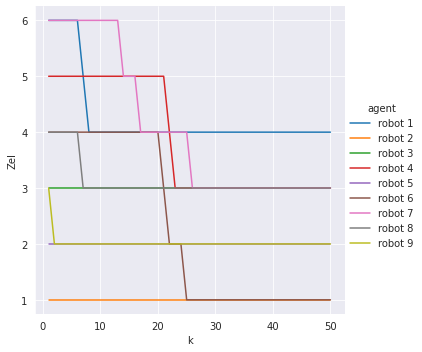

In [21]:
# tiempos = database[]
sns.relplot( x = 'k', y= 'Zel' ,data = df_data, kind='line' , hue = 'agent')
plt.show()

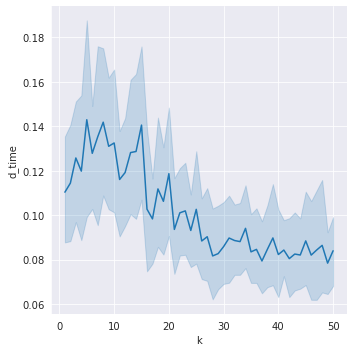

In [22]:
sns.relplot( x = 'k', y= 'd_time' ,data = df_data, kind='line' )
plt.show()

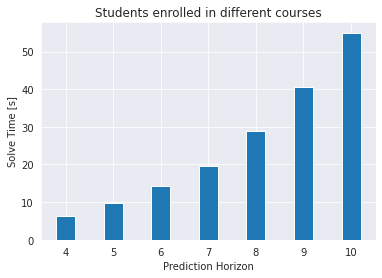

In [23]:
range_horizon = [4,5,6,7,8,9,10]
range_vehicles = [2,3,4,5,6,7,8,9,10,11,12]

# time of whole time vs horizon
sim_time = []
k_time = []
for i in range_horizon:
    mat = spio.loadmat(f'11vehicles/datasave/data_11v_{i}N.mat', squeeze_me=True)
    sim_time.append(mat['End'])
    k_time.append(mat['ktime'])

fig = plt.figure()

# creating the bar plot
plt.bar(range_horizon, sim_time, width = 0.4)
plt.xlabel("Prediction Horizon")
plt.ylabel("Solve Time [s]")
plt.title("Students enrolled in different courses")
plt.show()
# sim_time

<AxesSubplot:xlabel='horizon', ylabel='time'>

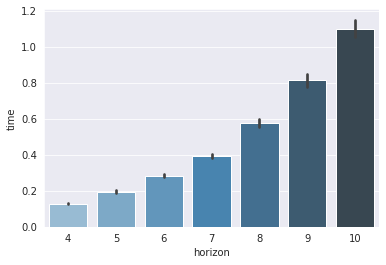

In [24]:
df_ktime = pd.DataFrame(k_time)
df_ktime['horizon'] = range_horizon
ktime_melt = df_ktime.melt(id_vars=['horizon'], var_name='k', value_name='time')
ktime_melt
sns.barplot(x="horizon", y="time", data=ktime_melt, palette='Blues_d')

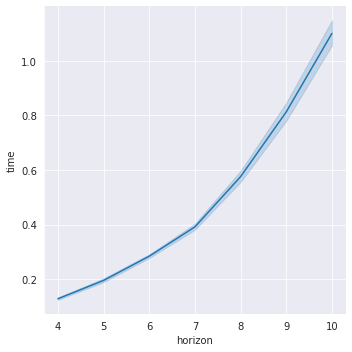

In [25]:
sns.relplot( x="horizon", y="time", data=ktime_melt, kind='line' )
plt.show()

In [26]:
# plot descentraliced and centralized times
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=1)

agent
robot 1    0.099529
robot 2    0.057876
robot 3    0.135124
robot 4    0.110822
robot 5    0.082064
robot 6    0.107153
robot 7    0.149287
robot 8    0.088201
robot 9    0.082957
dtype: float64

In [27]:
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=0)

k
1     0.110371
2     0.114444
3     0.125769
4     0.119846
5     0.142975
6     0.127855
7     0.135303
8     0.141869
9     0.131020
10    0.132520
11    0.116089
12    0.119202
13    0.128196
14    0.128683
15    0.140560
16    0.102734
17    0.098350
18    0.111838
19    0.106263
20    0.118700
21    0.093621
22    0.101086
23    0.101955
24    0.093148
25    0.102652
26    0.088412
27    0.090328
28    0.081694
29    0.082724
30    0.085894
31    0.089750
32    0.088618
33    0.088132
34    0.094098
35    0.083513
36    0.084634
37    0.079420
38    0.084694
39    0.089784
40    0.082325
41    0.084327
42    0.080488
43    0.082530
44    0.082102
45    0.088451
46    0.082060
47    0.084350
48    0.086444
49    0.078445
50    0.084021
dtype: float64

In [13]:
range_horizon = [4, 5, 6, 7, 8, 9, 10]
range_vehicles = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

time = []
k_time = []
for i in range_horizon:

    sim_time = []
    simk_time = []
    for j in range_vehicles:
        mat = spio.loadmat(f'{j}vehicles/datasave/data_{j}v_{i}N.mat', squeeze_me=True)
        sim_time.append(mat['End'])
        mean_time = np.mean(mat['ktime'])
        simk_time.append(mean_time)
    time.append(sim_time)
    k_time.append((simk_time))
time

[[0.745223,
  1.561937,
  2.309645,
  3.303286,
  3.43771,
  4.579707,
  5.9387,
  5.503545,
  5.945316,
  6.449611,
  7.391789],
 [0.620022,
  1.745125,
  3.049993,
  4.759467,
  5.060172,
  6.407753,
  8.759465,
  8.289325,
  9.286348,
  9.79804,
  10.406444],
 [0.747861,
  2.102972,
  4.023449,
  6.555944,
  6.553842,
  8.284105,
  13.08364,
  11.78089,
  13.132301,
  14.234959,
  15.746778],
 [0.773807,
  2.418526,
  5.266081,
  9.102412,
  9.085608,
  11.704004,
  18.619214,
  17.529109,
  18.758596,
  19.587799,
  22.725727],
 [0.902052,
  2.951332,
  6.97186,
  12.02239,
  12.046848,
  15.433959,
  26.114868,
  26.100128,
  26.897242,
  28.783759,
  32.733478],
 [0.984292,
  3.512623,
  8.800751,
  18.209765,
  17.52632,
  21.262811,
  28.08908,
  37.594053,
  37.54612,
  40.63132,
  43.962701],
 [1.153337,
  4.078822,
  11.409847,
  21.556674,
  21.924943,
  29.037249,
  35.96856,
  50.186504,
  50.649424,
  54.990848,
  56.838062]]

In [14]:
df_time = pd.DataFrame(time, columns=range_vehicles)
df_time['Horizon'] = range_horizon
time_melt = df_time.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# time_melt
df_ktime_mean = pd.DataFrame(k_time)
df_ktime_mean['Horizon'] = range_horizon
k_time_melt = df_ktime_mean.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# k_time_melt

In [15]:
time_melt

,Horizon,NumberVehicles,time
0,4,2,0.745223
1,5,2,0.620022
2,6,2,0.747861
3,7,2,0.773807
4,8,2,0.902052
...,...,...,...
72,6,12,15.746778
73,7,12,22.725727
74,8,12,32.733478
75,9,12,43.962701


In [16]:
times_simulation = time_melt.merge(k_time_melt, on=['Horizon', 'NumberVehicles'], how='inner', suffixes=('_Centralized', '_Descentralized'))
times_simulation

,Horizon,NumberVehicles,time_Centralized,time_Descentralized
0,4,2,0.745223,0.046191
1,5,2,0.620022,0.060998
2,6,2,0.747861,0.080467
3,7,2,0.773807,0.105320
4,8,2,0.902052,0.139435
...,...,...,...,...
58,6,10,13.132301,0.314934
59,7,10,18.758596,0.454513
60,8,10,26.897242,0.654668
61,9,10,37.546120,0.879252


In [17]:
times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')

,Horizon,NumberVehicles,Method,time
0,4,2,time_Centralized,0.745223
1,5,2,time_Centralized,0.620022
2,6,2,time_Centralized,0.747861
3,7,2,time_Centralized,0.773807
4,8,2,time_Centralized,0.902052
...,...,...,...,...
121,6,10,time_Descentralized,0.314934
122,7,10,time_Descentralized,0.454513
123,8,10,time_Descentralized,0.654668
124,9,10,time_Descentralized,0.879252


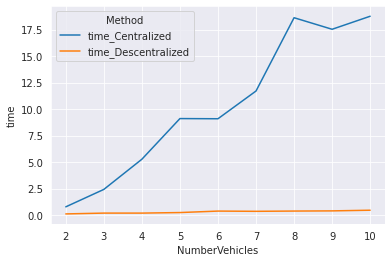

In [28]:
plot_data = times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')
sns.lineplot(x='NumberVehicles', y='time', data = plot_data[plot_data['Horizon']==7], hue='Method')
plt.show()

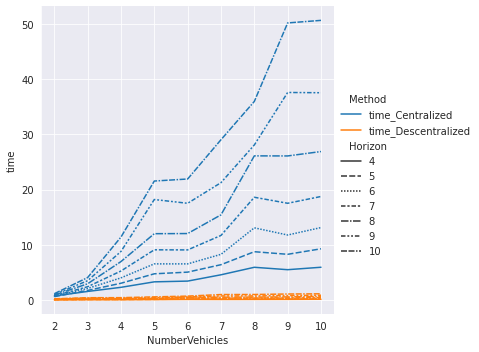

In [29]:
sns.relplot( x = 'NumberVehicles', y= 'time' ,data = plot_data, kind='line' , hue = 'Method', style="Horizon")
plt.show()